# Item Store Analysis

### Fortnite Battle Royale

Fortnite Battle Royale by Epic Games is one of the most sucessful games in the battle royale genre. Released in 2017, it has been a huge success, with over 350 million players worldwide. The game is free to play, but it has a monetization system based on the sale of cosmetic items, such as skins, emotes, pickaxes, gliders, etc. These items are sold in the Item Shop, which is updated daily with new items. The items are sold for V-Bucks, the in-game currency, which can be bought with real money.

### What

An analysis of the Fortnite Battle Royale item shop from the perspective of economic game design.

This study intends to cover the availability and monetization of the items daily on sale for Fortnite Battle Royale.

### How

By scraping, cleaning and organising the data available on a fandom website (https://fnbr.co/shop) and exploring availability, seasonality, price range, spending depth, etc. over time to gather insights and answer questions from the game development perspective.

### Why

One of the common practices when designing and developing new games is to study the most successful games in that genre, the so called benchmarks, to get a better understanding of their monetization system and what is needed in the different stages of the game development and adoption.

In [1]:
import numpy as np
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import os
import warnings
warnings.filterwarnings('ignore')
# import pygwalker as pyg # This is a Tableau-like viz library


#plt.rcParams.update({"figure.dpi": 150}) # set dpi for all figures
#sns.despine() # remove top and right spines from plots
#plt.style.use("dark_background")

os.getcwd() # get current working directory

'/Users/gdbr/Documents/Hyper Island/DA24STO/Modules/12. Individual Project/fortnite-store-analysis'

In [2]:
# Load the data
df = pd.read_csv(os.getcwd() + "/csv/" + "store.csv")

# Convert the date column to datetime; add year, quarter, month, week columns
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] =  df['date'].map(lambda x:x.year)
df['quarter'] =  df['date'].map(lambda x:x.quarter)
df['month'] =  df['date'].map(lambda x:x.month)
df['week'] =  df['date'].map(lambda x:x.week)

df["rarity_v2"] = df["rarity"].map(lambda x: "dc_m_sw" if x in ["dc", "marvel", "star_wars"] else x)

df_first_occurence = df.drop_duplicates("name")
df["first"] = np.where(df.index.isin(df_first_occurence.index), True,False ) # https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

df["one"] = 1
df["occurence"] = df.groupby("name")["one"].transform("cumsum")
df = df.sort_values("date")
df['$'] =  df['cost'] / (1000 / 7.99) # 1000 V-Bucks currently cost USD 7,99 - https://store.epicgames.com/en-US/p/fortnite--1000-v-bucks
df['$'] = df['$'].round(2)

# Drop the item if the cost is -1
df = df[df.cost != -1]

df

,date,rarity,item_type,name,cost,year,quarter,month,week,rarity_v2,first,one,occurence,$
28897,2017-10-30,rare,outfit,First strike Specialist,1200,2017,4,10,44,rare,False,1,7,9.59
28895,2017-10-30,epic,outfit,Ghoul Trooper,1500,2017,4,10,44,epic,False,1,18,11.98
28900,2017-10-30,uncommon,outfit,Scout,800,2017,4,10,44,uncommon,False,1,7,6.39
28899,2017-10-30,uncommon,glider,Petunia,500,2017,4,10,44,uncommon,False,1,17,4.00
28898,2017-10-30,rare,outfit,Recon Expert,1200,2017,4,10,44,rare,False,1,12,9.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71600,2023-08-17,uncommon,outfit,FNCS Renegade,800,2023,3,8,33,uncommon,False,1,2,6.39
71599,2023-08-17,uncommon,pickaxe,Star Jet,500,2023,3,8,33,uncommon,False,1,2,4.00
71598,2023-08-17,uncommon,wrap,Good to Go,300,2023,3,8,33,uncommon,False,1,2,2.40
71649,2023-08-17,legendary,outfit,The Mighty Volt,1800,2023,3,8,33,legendary,False,1,39,14.38


In [3]:
# How many days?
df['date'].nunique()

2116

In [4]:
# Is any date missing?
pd.date_range(start=df['date'].min(), end=df['date'].max()).difference(df['date'])

DatetimeIndex(['2018-05-09', '2019-10-14'], dtype='datetime64[ns]', freq=None)

In [5]:
display(df.head())
display(df['rarity'].unique())
display(df['item_type'].unique())

,date,rarity,item_type,name,cost,year,quarter,month,week,rarity_v2,first,one,occurence,$
28897,2017-10-30,rare,outfit,First strike Specialist,1200,2017,4,10,44,rare,False,1,7,9.59
28895,2017-10-30,epic,outfit,Ghoul Trooper,1500,2017,4,10,44,epic,False,1,18,11.98
28900,2017-10-30,uncommon,outfit,Scout,800,2017,4,10,44,uncommon,False,1,7,6.39
28899,2017-10-30,uncommon,glider,Petunia,500,2017,4,10,44,uncommon,False,1,17,4.00
28898,2017-10-30,rare,outfit,Recon Expert,1200,2017,4,10,44,rare,False,1,12,9.59


array(['rare', 'epic', 'uncommon', 'legendary', 'slurp', 'marvel', 'dark',
       'icon_series', 'frozen', 'shadow', 'gaming_legends', 'dc',
       'star_wars', 'lava', 'common'], dtype=object)

array(['outfit', 'glider', 'pickaxe', 'emote', 'misc', 'backpack',
       'bundle', 'wrap', 'toy', 'pet', 'music', 'skydive', 'banner',
       'loading', 'spray', 'emoji'], dtype=object)

In [6]:
# How many rarity types?
df['rarity'].nunique()

15

In [7]:
# How many item types?
df['item_type'].nunique()

16

In [8]:
# Number of unique items — assuming names act like unique id
df["name"].nunique()

3348

In [9]:
# How many free items are there?
df.loc[df["cost"] == 0].shape[0]

323

In [10]:
# What's the percentage of free items?
# len(df.loc[df["cost"] == 0]) / len(df)
df.loc[df["cost"] == 0].shape[0] / df.shape[0]

0.003971913773809963

In [11]:
# How many items are there per rarity?
df.groupby("rarity")["name"].count()

rarity
common               18
dark                281
dc                 2842
epic              14406
frozen                9
gaming_legends     2509
icon_series        6878
lava                 37
legendary          2961
marvel             6241
rare              25267
shadow              249
slurp               350
star_wars          2194
uncommon          17079
Name: name, dtype: int64

In [12]:
# How many unique items are there per rarity?
df.groupby("rarity")["name"].nunique()

rarity
common               1
dark                 8
dc                  59
epic               597
frozen               1
gaming_legends      95
icon_series        222
lava                 2
legendary           93
marvel             127
rare              1234
shadow              10
slurp               11
star_wars           54
uncommon           836
Name: name, dtype: int64

In [13]:
# How many items are there per item type?
df.groupby("item_type")["name"].count()

item_type
backpack     1387
banner         20
bundle       7635
emoji          14
emote       13090
glider       6850
loading        50
misc          102
music         653
outfit      30610
pet             7
pickaxe     15081
skydive        83
spray         101
toy             1
wrap         5637
Name: name, dtype: int64

In [14]:
# How many unique items are there per item type?
df.groupby("item_type")["name"].nunique()

item_type
backpack      78
banner         6
bundle       374
emoji          1
emote        487
glider       243
loading        6
misc           1
music         70
outfit      1165
pet            1
pickaxe      592
skydive        4
spray          6
toy            1
wrap         317
Name: name, dtype: int64

In [15]:
# Cost breakdown of items: 
df["$"].describe()

count    81321.000000
mean         8.168825
std          4.661324
min          0.000000
25%          4.000000
50%          6.390000
75%         11.980000
max         32.600000
Name: $, dtype: float64

## Summary

### Data:

- 2116 days of items on sale from 2017-10-30 to 2023-08-17 (two days are missing at the store)
- Source of the data: https://fnbr.co/shop
- Total items: 81321 (13 dropped items because of missing cost)
- Total unique items: 3348
- Free items: 323 (less then 0,4%)

## Store Prices

Once an item is introduced, it's price does not change, with the exception of 3 outliners.

Looking on how items price changed over time, the mean value hasn’t drifted, but the min and max values got wider.

The daily store value, however, increased greatly after 2020 (Pic. 2), which probably has to do with the number of items available daily also increasing as they started reintroducing old items back to the store.





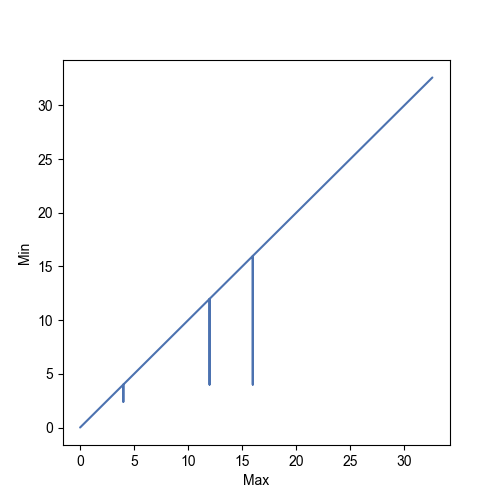

In [16]:
df_price_changes= df.groupby(["name"]).agg(Mean=('$','mean'), Max=('$','max'), Min=("$","min"))
df_price_changes_sorted = df_price_changes.sort_values("Mean")
f, ax = plt.subplots(figsize=(5,5))
ax.tick_params()
p3 = so.Plot(df_price_changes, "Max", "Min")
p3.add(so.Line()).on(ax).show()

In [17]:
df_price_changes["delta"] = df_price_changes["Max"] - df_price_changes["Min"]
df_price_changes.loc[df_price_changes["delta"] != 0]

,Mean,Max,Min,delta
name,,,,
Blaze,10.124186,11.98,4.0,7.98
Lucky,3.620339,4.00,2.4,1.60
Raptor,13.983333,15.98,4.0,11.98


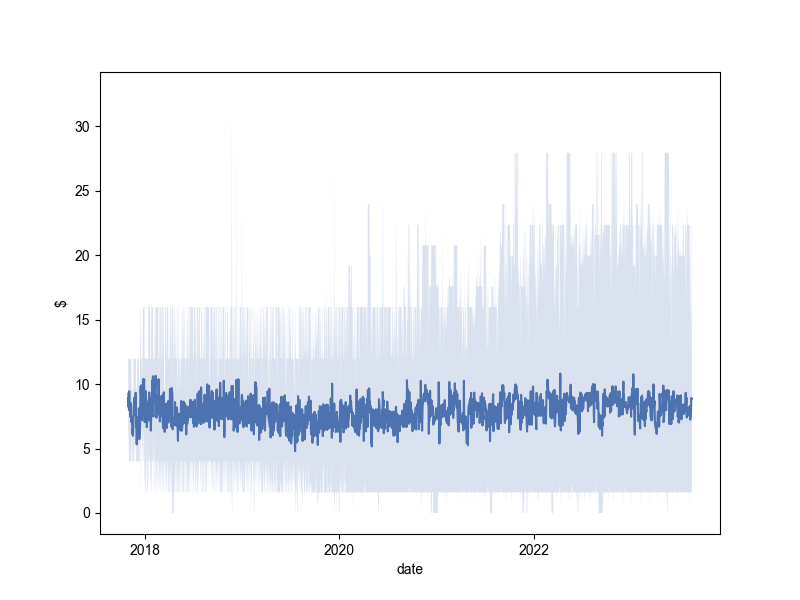

In [18]:
# Item price, avg and interval
f, ax = plt.subplots(figsize=(8,6))
pCost = so.Plot(df, "date", "$")
pCost.add(so.Line(), so.Agg()).add(so.Band()).on(ax).show() # Explain this line: https://seaborn.pydata.org/examples/errorband_lineplots.html

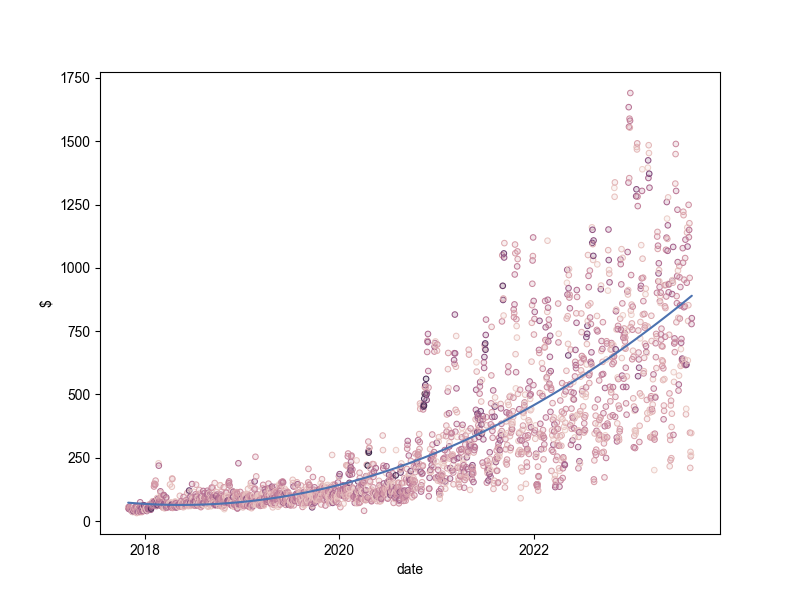

In [19]:
# Daily store value
daily_store_value_and_age = df.groupby('date').agg({'$':'sum', 'occurence':'mean', "one":"sum"})
# daily_store_value_and_age["avg_item_$"] = daily_store_value_and_age["$"] / daily_store_value_and_age["one"]


f, ax = plt.subplots(figsize=(8,6))
pCost = so.Plot(daily_store_value_and_age, "date", "$")
pCost.add(so.Dots(),color="occurence", legend=False).add(so.Line(), so.PolyFit()).on(ax).show()

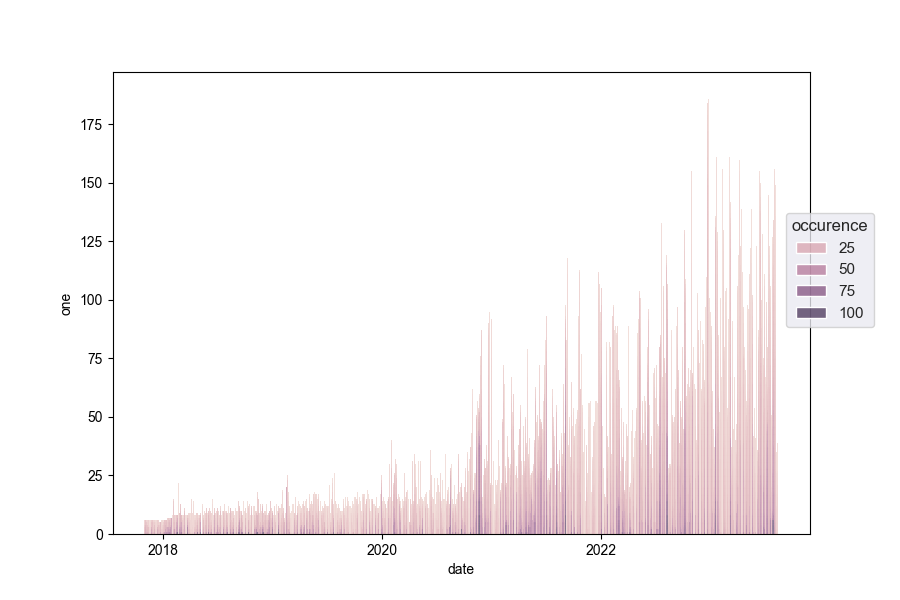

In [20]:
# Age / occurence of each item # Dark is old, new is bright
df_sorted_by_occurence = df.sort_values("occurence", ascending=False)
f, ax = plt.subplots(figsize=(9,6))
pCost = so.Plot(df_sorted_by_occurence, "date", "one")
pCost.add(so.Bars(), so.Stack(), color="occurence").on(ax).show()

<Axes: xlabel='date', ylabel='cumsum'>

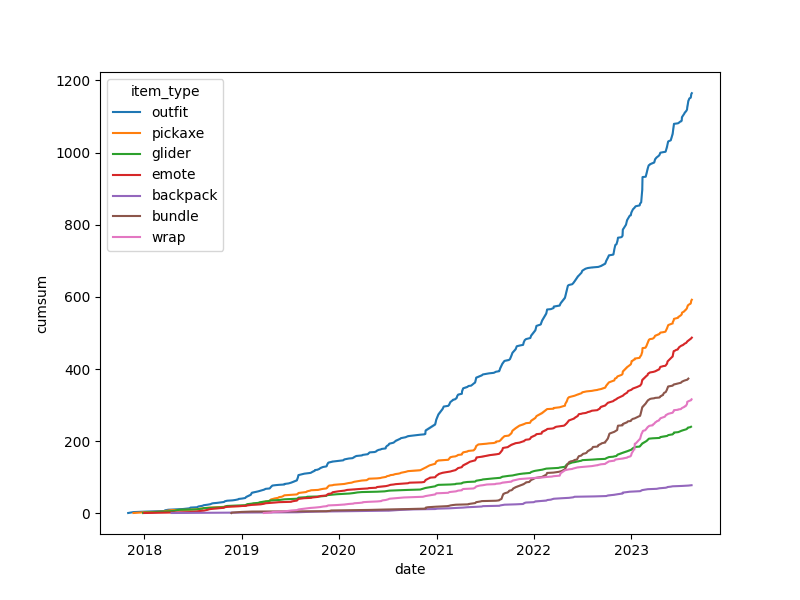

In [21]:
# New content each month of types
df_filtered = df.loc[(df["first"]==True) & (-df["item_type"].isin(["skydive", "music", "spray", "loading", "emoji", "pet", "banner", "toy", "misc"]))]
df_filtered["cumsum"] = df_filtered.groupby(['item_type'])["one"].transform('cumsum')
f, ax = plt.subplots(figsize=(8,6))
sns.lineplot(df_filtered, x="date", y="cumsum", hue="item_type")

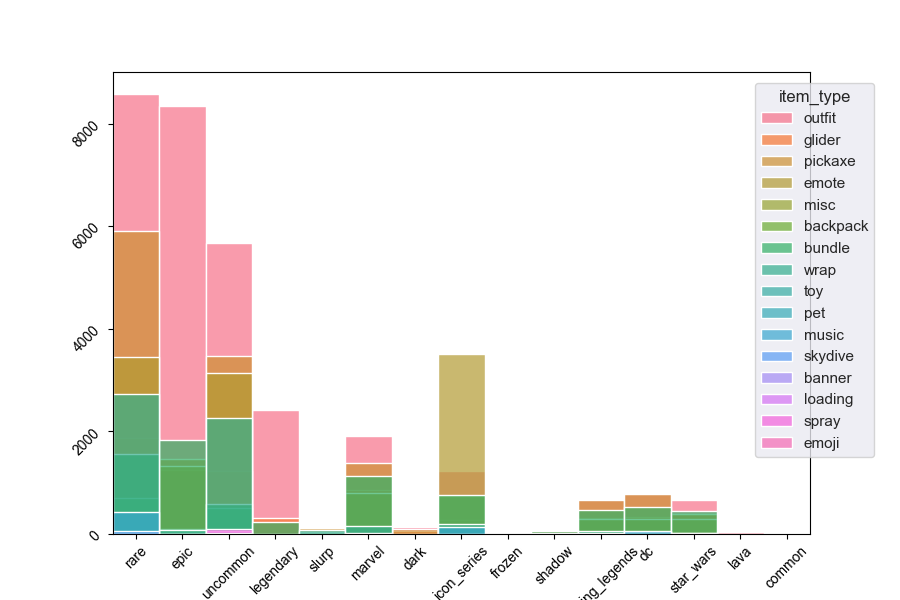

In [22]:
# How frequent are different types/rarity?
f, ax = plt.subplots(figsize=(9,6))
ax.tick_params(labelrotation=45)

p = so.Plot(df.loc[df["year"] > 2016], "rarity", color="item_type")
p.add(so.Bars(), so.Hist()).on(ax).show()

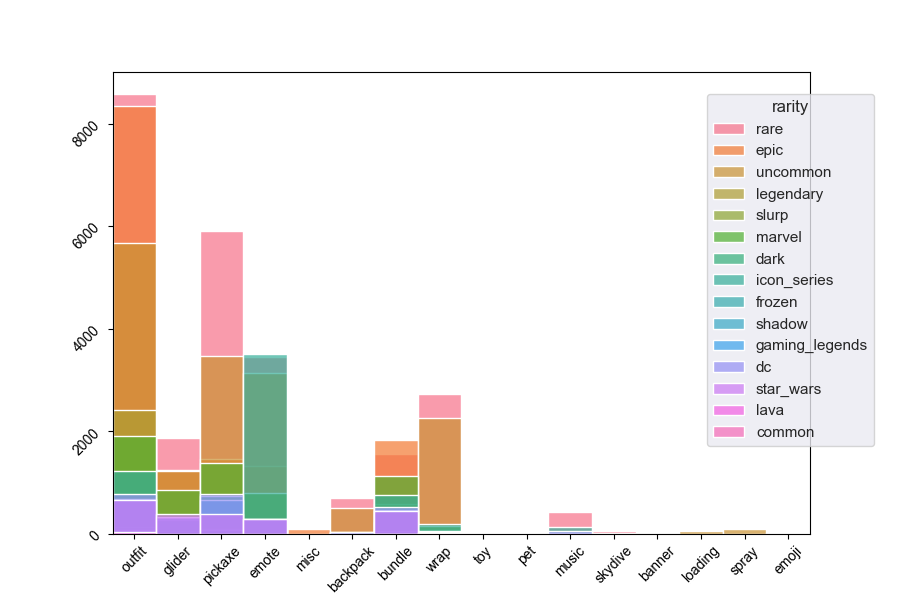

In [23]:
f, ax = plt.subplots(figsize=(9,6))
ax.tick_params(labelrotation=45)
p2 = so.Plot(df, "item_type", color="rarity")
p2.add(so.Bars(), so.Hist()).on(ax).show()

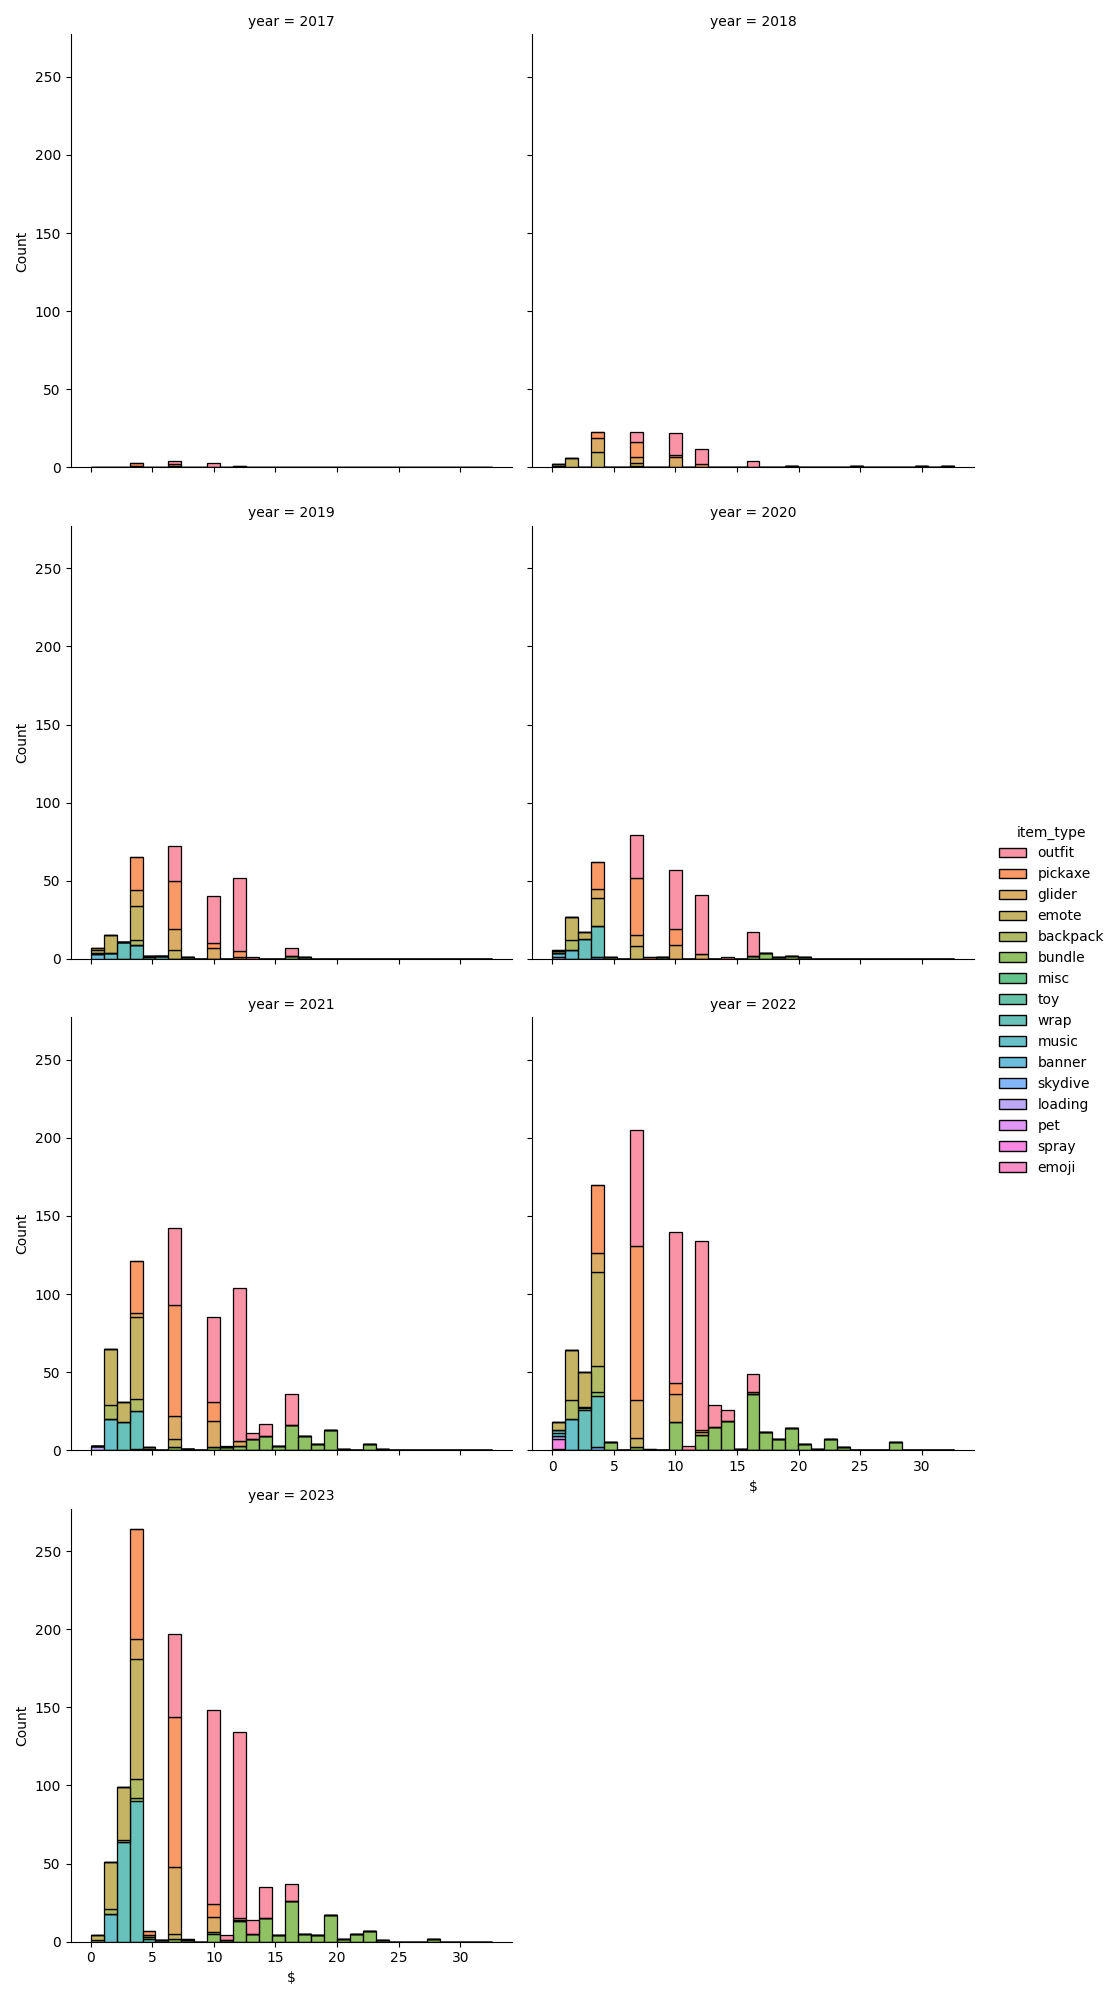

In [24]:
# New content each year, x = $
sns.displot(df.loc[df["first"] == True], x="$", col ="year", 
                col_wrap=2,
                 hue="item_type", 
                multiple="stack",
                  )

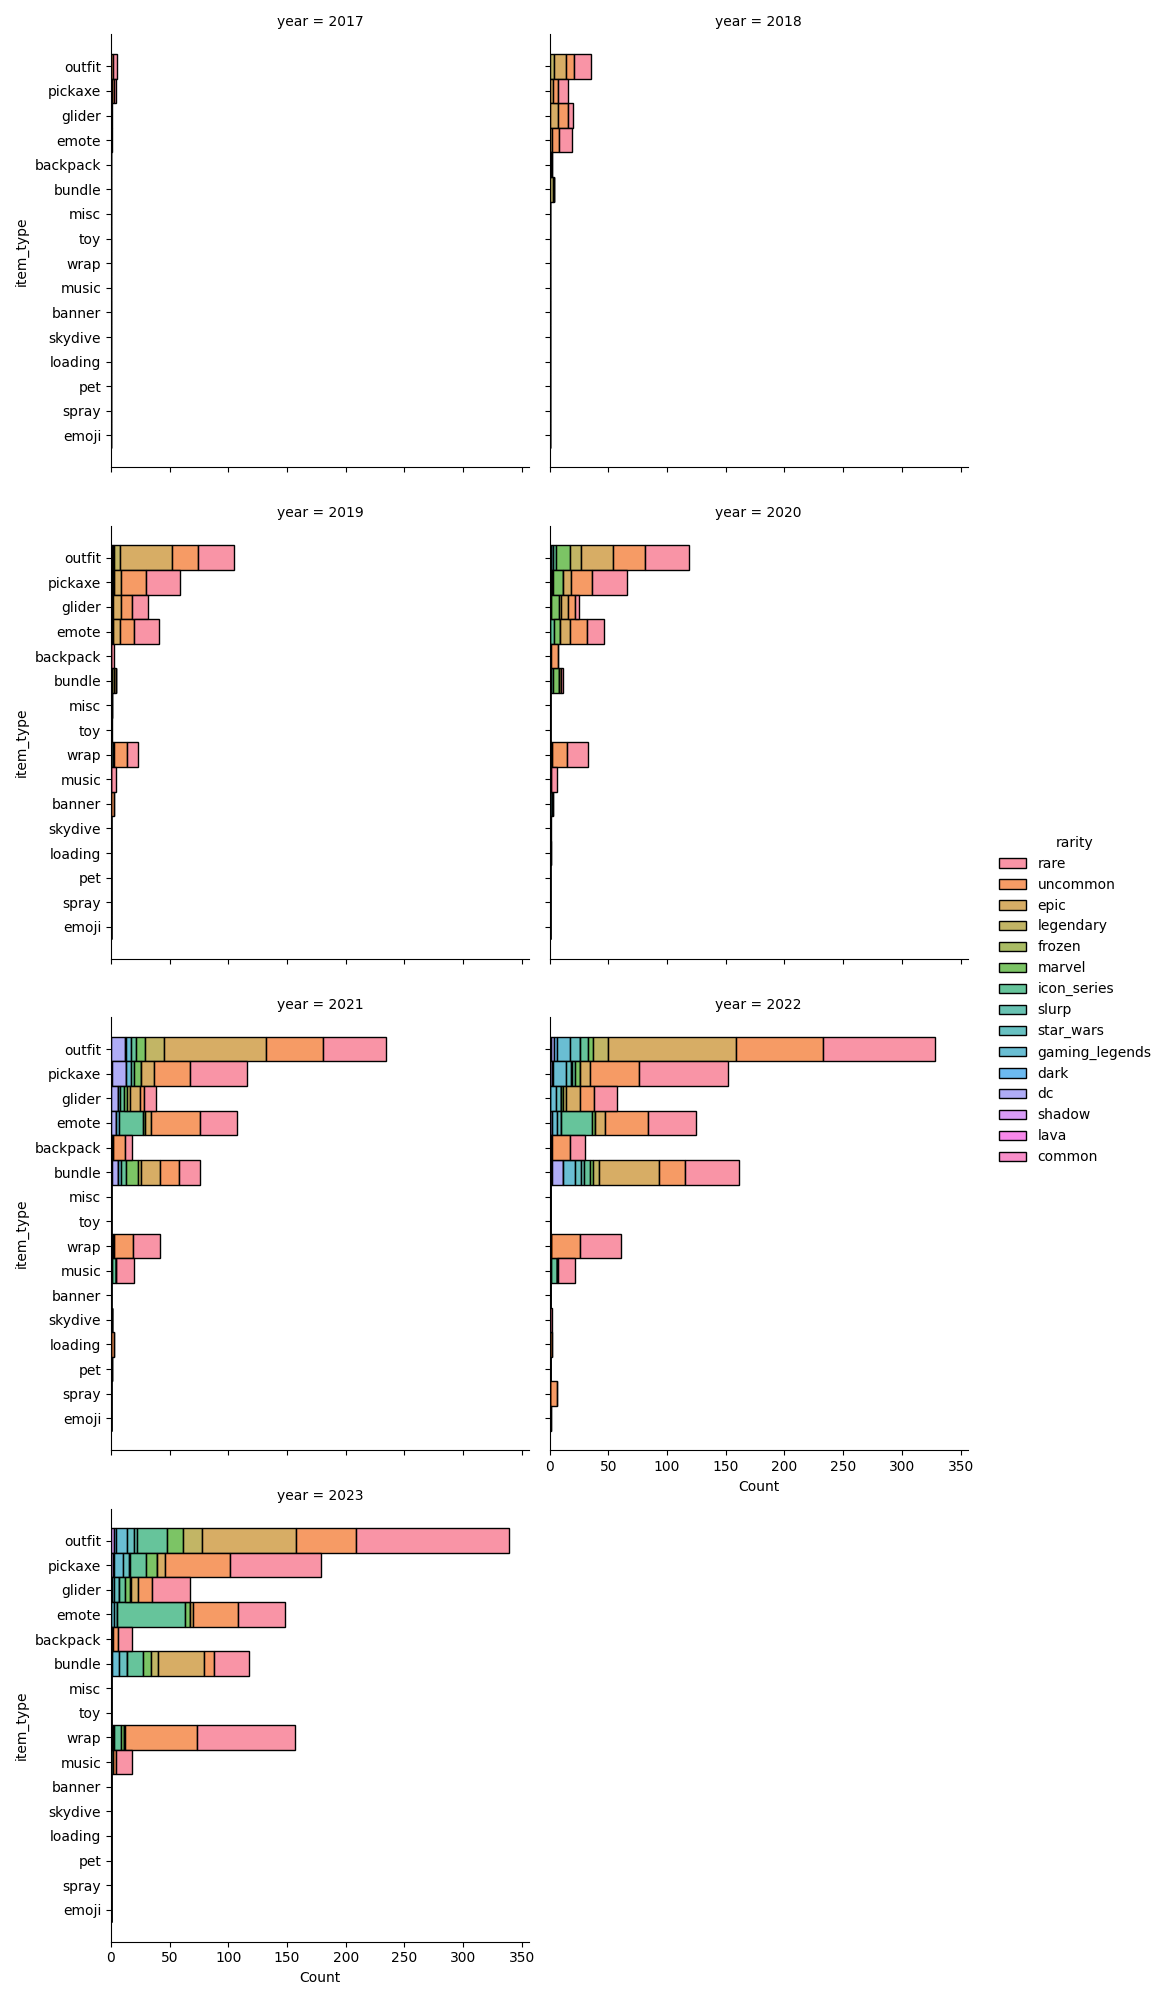

In [25]:
# New content each year, x = $
sns.displot(df.loc[df["first"] == True], y="item_type", col ="year", 
                col_wrap=2,
                 hue="rarity", 
                multiple="stack",
                  )

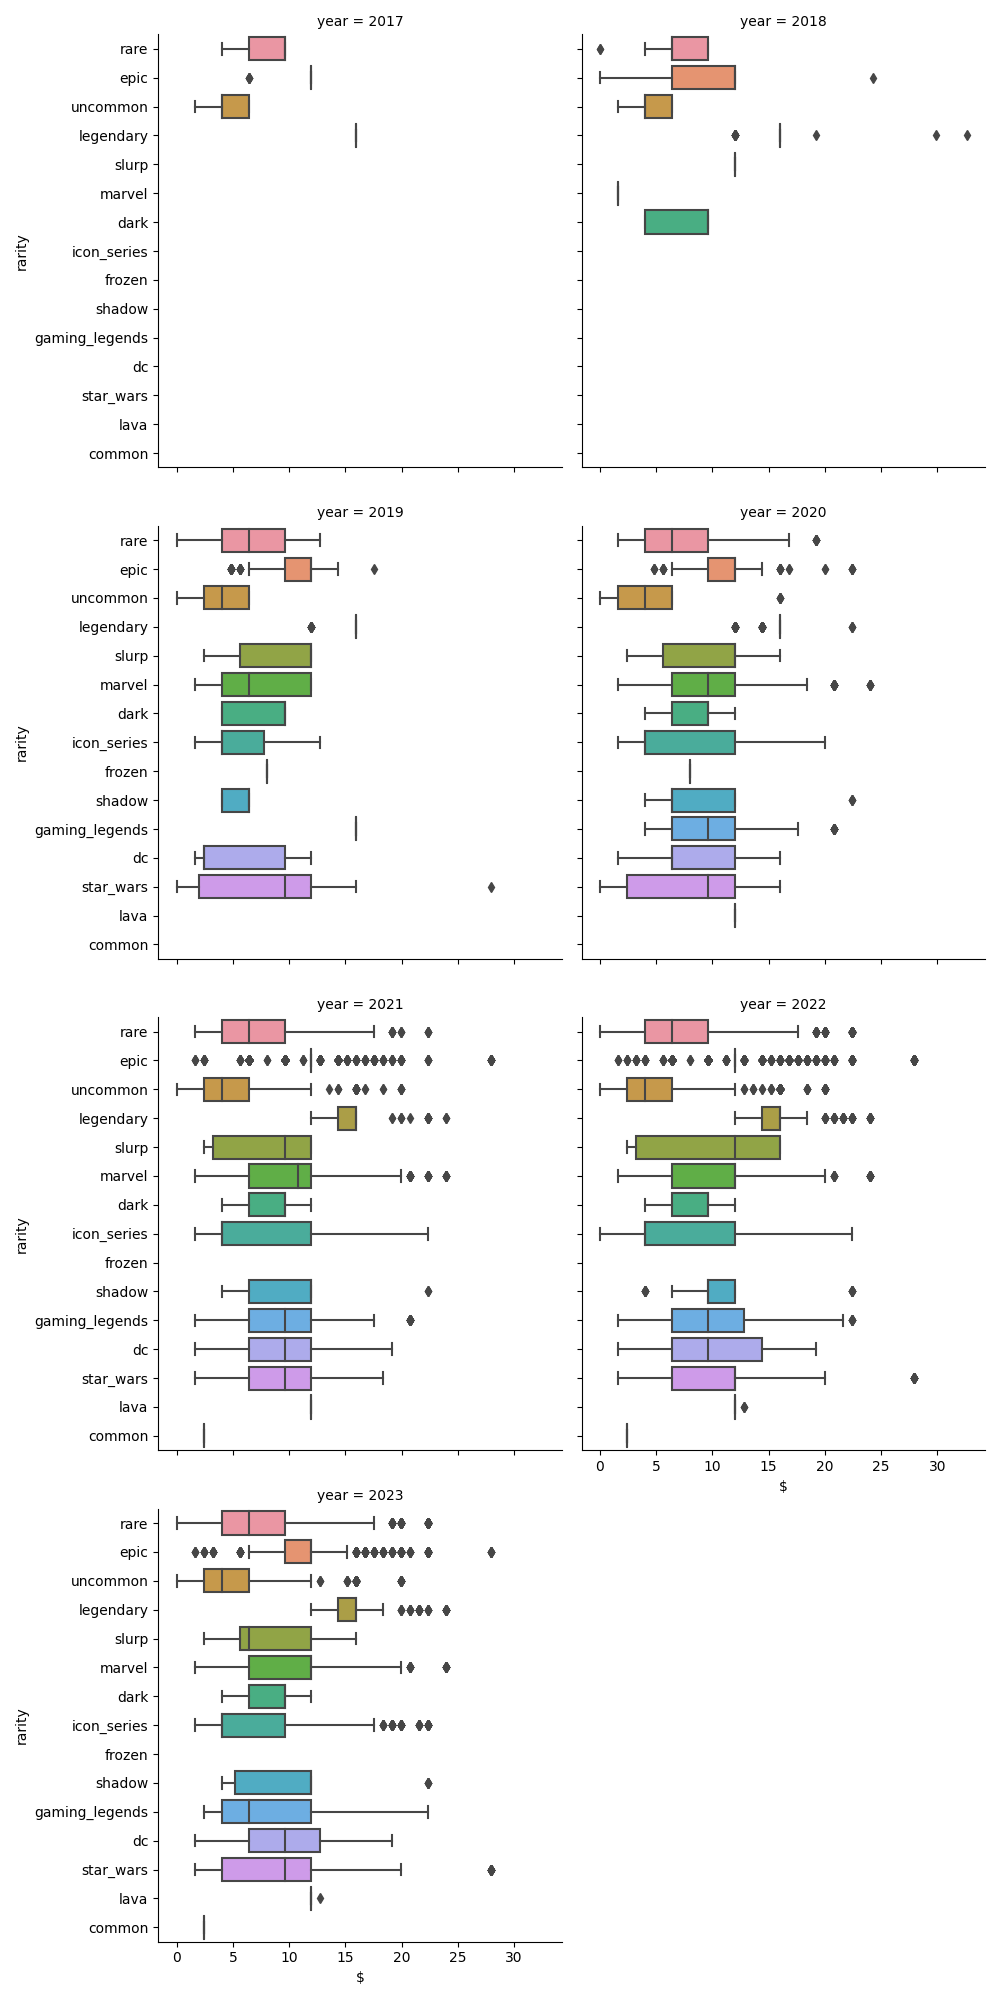

In [26]:
plot = sns.catplot(data=df, kind="box", y="rarity", x="$", col="year", col_wrap=2)
# plot.set(title="Rarity prices")

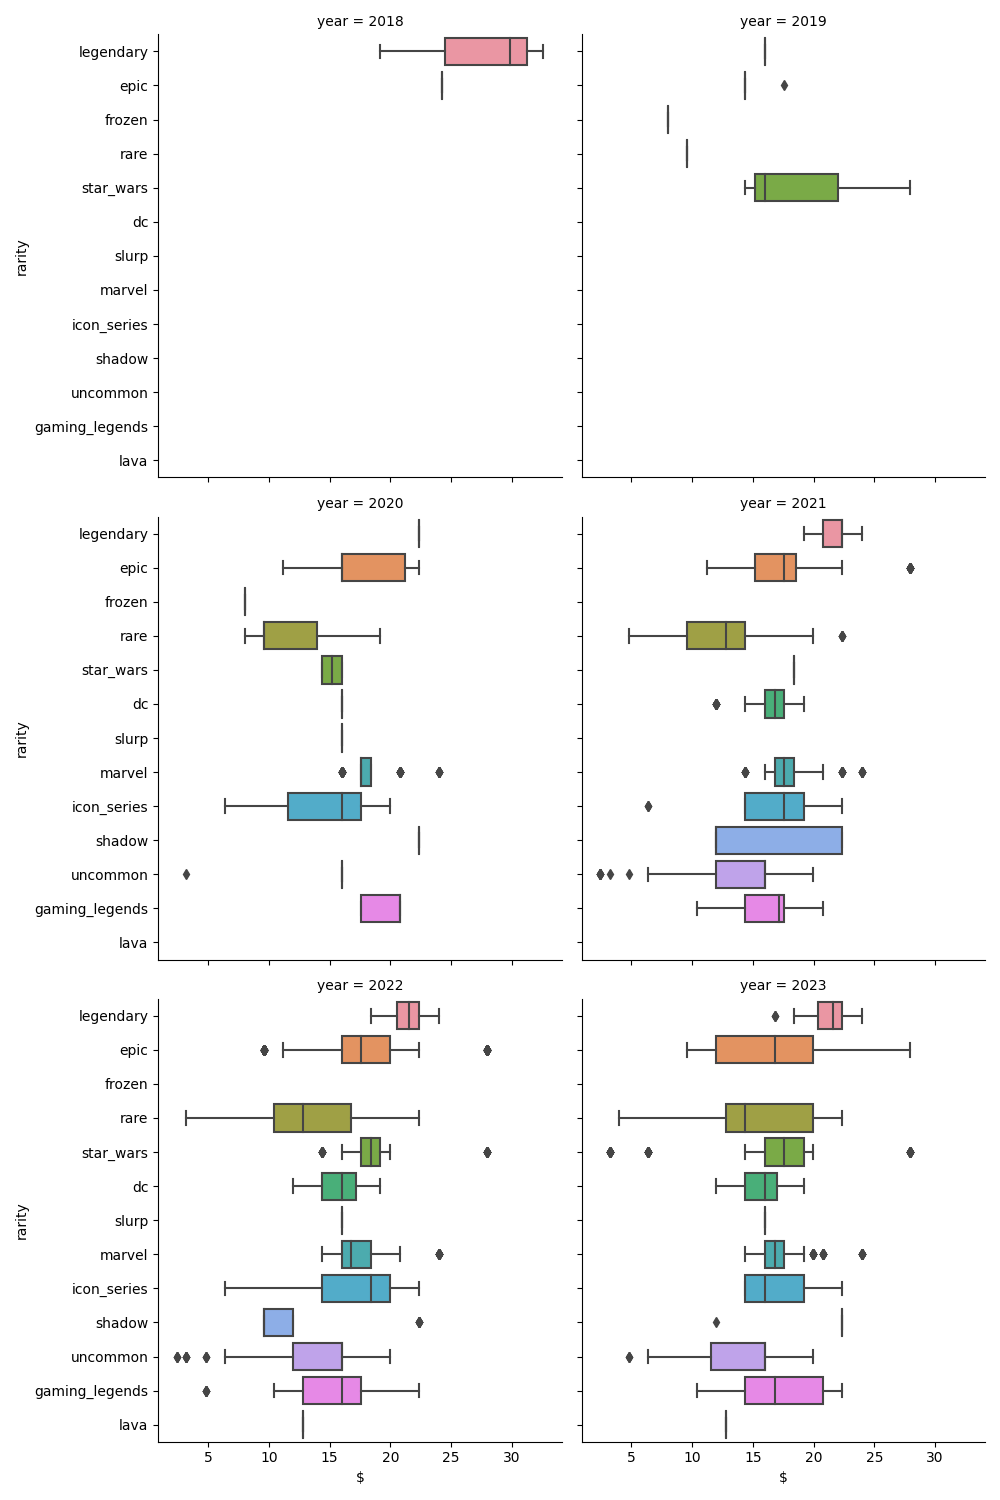

In [27]:
# Different bundles types
plot = sns.catplot(data=df.loc[df["item_type"] == "bundle"], kind="box", x="$", y="rarity", col= "year", col_wrap=2 )

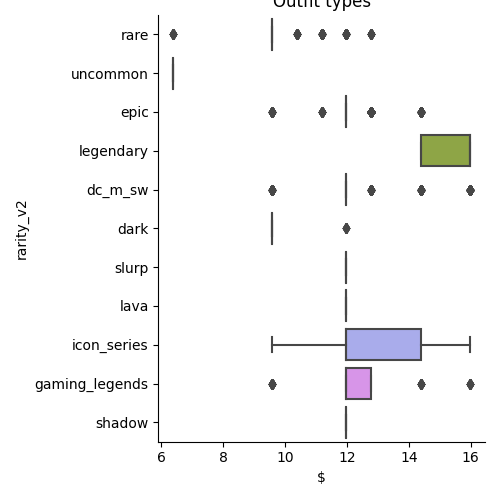

In [28]:
# Different Oufit
plot = sns.catplot(data=df.loc[(df["item_type"] == "outfit") & (df["year"] > 2021)], kind="box", x="$", y="rarity_v2")
plot.set(title="Outfit types")